# EDA

#### DATASET DESCRIPTION

The following datasets were obtained based on a 44000+ movies fetched using the TMDB API and the ETL process depicted in the ETL.ipynb file of this same project

#### ORIGINAL COLUMNS

The original columns of the data set where as follows:

* adult: Indicates if the movie is X-rated, adult-only.
* belongs_to_collection: A **dictionary** that indicates to which movie franchise or series the movie belongs.
* budget: The budget of the film, in dollars
* genres: A dictionary indicating all the genres associated with the movie.
* homepage: The official website of the movie
* id: ID of the movie
* imdb_id : IMDB ID of the film
* original_language: Original language in which the movie was recorded
* original_title: Original title of the movie
* overview: Short summary of the movie
* popularity: Popularity Score of the movie, assigned by TMDB (TheMoviesDataBase)
* poster_path: URL of the movie poster
* production_companies: **List** of production companies associated with the movie
* production_countries: **List** of countries where the movie was produced
* release_date Release date of the movie
* revenue : Gross revenue of the film, in dollars
* runtime : Duration of the film, in minutes
* spoken_languages: **List** of languages spoken in the movie
* status : Status of the current movie (if it was announced, if it has been released, etc.)
* tagline : Phrase associated with the movie
* title : Title of the movie
* video : Indicates whether or not there is a video trailer available on TMDB
* vote_average : Average score of reviews of the film
* vote_count : Number of votes received by the movie, in TMDB.



#### MODIFIED COLUMNS
Most of the columns of the original datasets were modified and or normalized:

* genres_id: stores only the id of the genres associated to a given movie.
* collection_id: similarly, the 'belong_to_collection' was normalized.
* production_companies_ids, spoken_languages_ids, production_countries_ids: A similar process of normalization was performed for the production_companies, spoken languages, and production_countried.


#### EDA Questions

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import json
import ast
from wordcloud import WordCloud

In [2]:
# Load the data from the Datasets folder

filepath = './datasets/df_movies_clean.csv'

df_movies = pd.read_csv(filepath)

filepath = './datasets/df_crew.csv'

df_crew = pd.read_csv(filepath)

filepath = './datasets/df_cast.csv'

df_cast = pd.read_csv(filepath)

filepath = './datasets/df_recommendation.csv'

df_tags = pd.read_csv(filepath)

In [5]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45376 entries, 0 to 45375
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   budget                    45376 non-null  int64  
 1   genres                    45376 non-null  object 
 2   id                        45376 non-null  int64  
 3   original_language         45365 non-null  object 
 4   overview                  44435 non-null  object 
 5   popularity                45376 non-null  float64
 6   production_companies      45373 non-null  object 
 7   production_countries      45376 non-null  object 
 8   release_date              45376 non-null  object 
 9   revenue                   45376 non-null  float64
 10  runtime                   45130 non-null  float64
 11  spoken_languages          45350 non-null  object 
 12  status                    45296 non-null  object 
 13  tagline                   20398 non-null  object 
 14  title 

#### Q1. What year did the most movies get made?

From this visualization it can be seen that the year 2014 was the year most movies were made according to the dataset.
Additionally, it can be observed that more movies are released in recent years.

<Axes: title={'center': 'Release Year'}>

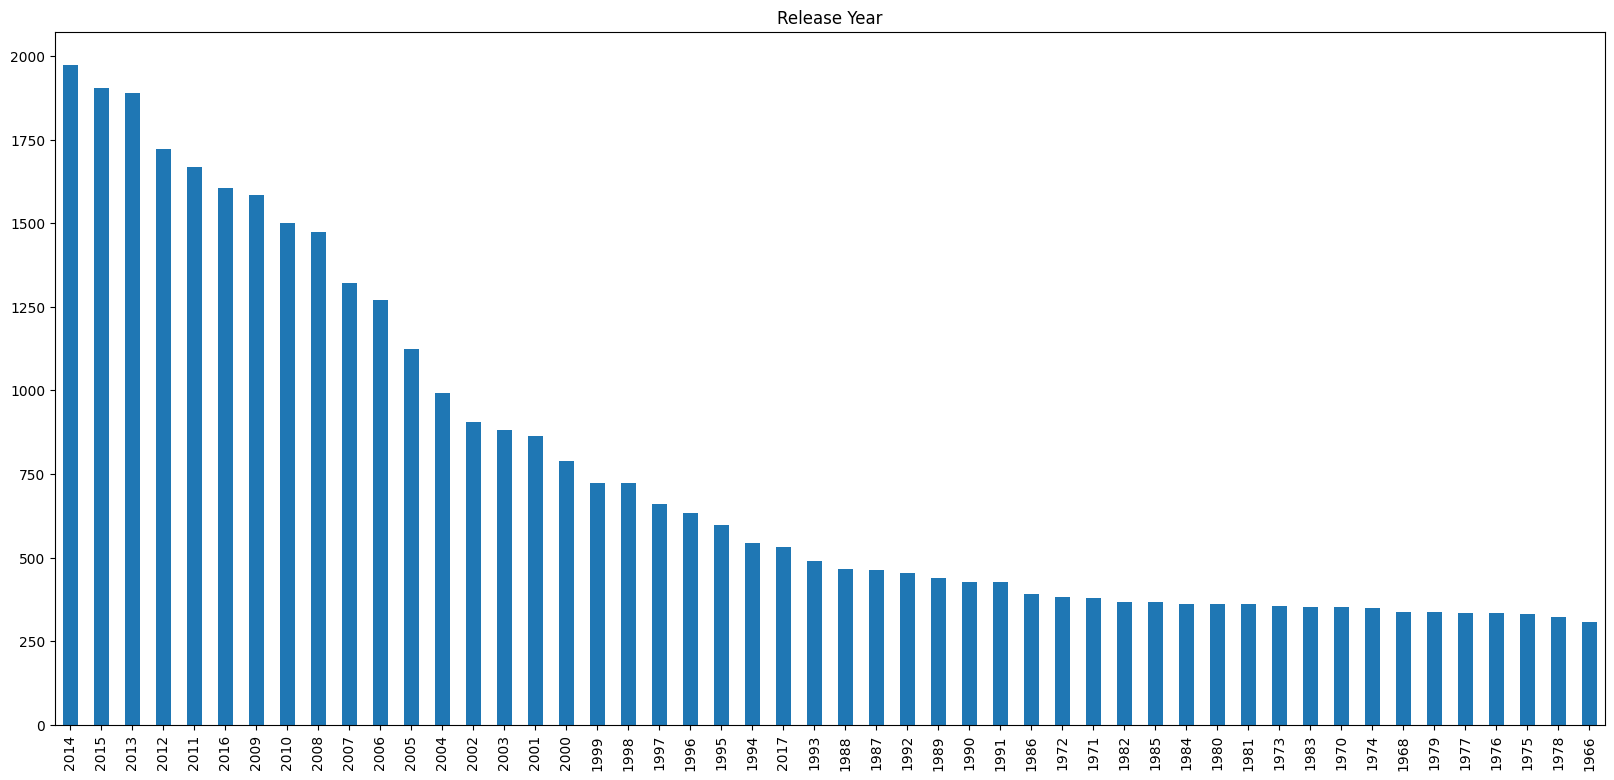

In [6]:
df_movies['release_year'].value_counts()[:50].plot(kind='bar', title='Release Year', figsize=(20,9))

#### Q2. What genre is the most frequent?

The genres dataframe tells us that the most frequent genre in the dataset is 'Drama'

In [19]:
# First, we'll define a function that counts the occurrences of each genre ID in a list
def count_genres(genre_list):
    # Create a dictionary to store the counts of each genre ID
    genre_counts = {}
    # Iterate over each genre ID in the list
    for genre_id in genre_list:
        # If the genre ID is already in the dictionary, increment its count
        if genre_id in genre_counts:
            genre_counts[genre_id] += 1
        # Otherwise, add the genre ID to the dictionary with a count of 1
        else:
            genre_counts[genre_id] = 1
    # Convert the dictionary to a Pandas Series and return it
    return pd.Series(genre_counts)

df_movies['genres_ids'] = df_movies['genres_ids'].apply(ast.literal_eval)
# Use the apply() method to apply the count_genres function to each row in the DataFrame
genre_counts_df = df_movies['genres_ids'].apply(count_genres)
# Sum the counts for each genre ID across all rows to get the total count for each genre ID
genre_counts = genre_counts_df.sum().sort_values(ascending=False)
# Finally, we'll display the results
print(genre_counts)


<ipython-input-19-3eea3165ce91>:14: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(genre_counts)
<ipython-input-19-3eea3165ce91>:14: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(genre_counts)
<ipython-input-19-3eea3165ce91>:14: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(genre_counts)
<ipython-input-19-3eea3165ce91>:14: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(genre_counts)
<ipython-input-19-3eea3165ce91>:14: FutureWarning: The default dtype for empty S

18       20255.0
35       13181.0
53        7619.0
10749     6733.0
28        6592.0
27        4670.0
80        4305.0
99        3921.0
12        3494.0
878       3042.0
10751     2768.0
9648      2464.0
14        2313.0
16        1932.0
10769     1621.0
10402     1598.0
36        1397.0
10752     1323.0
37        1042.0
10770      766.0
dtype: float64


In [21]:
genre_counts


18       20255.0
35       13181.0
53        7619.0
10749     6733.0
28        6592.0
27        4670.0
80        4305.0
99        3921.0
12        3494.0
878       3042.0
10751     2768.0
9648      2464.0
14        2313.0
16        1932.0
10769     1621.0
10402     1598.0
36        1397.0
10752     1323.0
37        1042.0
10770      766.0
dtype: float64

In [23]:
filepath = '/content/drive/MyDrive/Notebooks/Henry/PI/MLOps/datasets/'

df_genres = pd.read_csv(filepath+ 'df_genres.csv')

genre_counts = genre_counts.rename('count')
# Merge the genre_counts Series with the df_genres DataFrame to get the genre names
genre_counts_with_names = pd.merge(df_genres, genre_counts, left_on='id', right_index=True)

In [24]:
genre_counts_with_names

,id,name,count
0,16,Animation,1932.0
1,12,Adventure,3494.0
2,10749,Romance,6733.0
3,35,Comedy,13181.0
4,28,Action,6592.0
5,10751,Family,2768.0
6,36,History,1397.0
7,18,Drama,20255.0
8,80,Crime,4305.0
9,14,Fantasy,2313.0


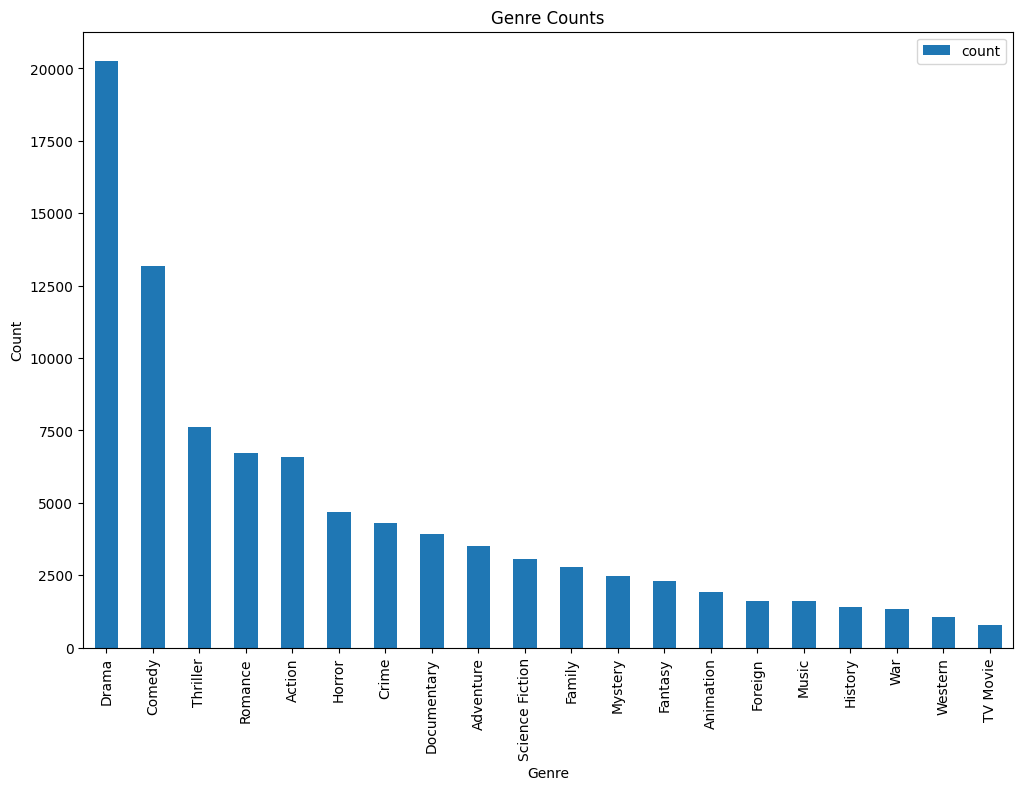

In [26]:
# Sort the DataFrame by genre count in descending order
genre_counts_with_names = genre_counts_with_names.sort_values(by='count', ascending=False)
# Create a bar plot of the genre counts
genre_counts_with_names.plot(kind='bar', x='name', y='count', figsize=(12, 8))
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Counts')
plt.show()

<Figure size 1500x1500 with 0 Axes>

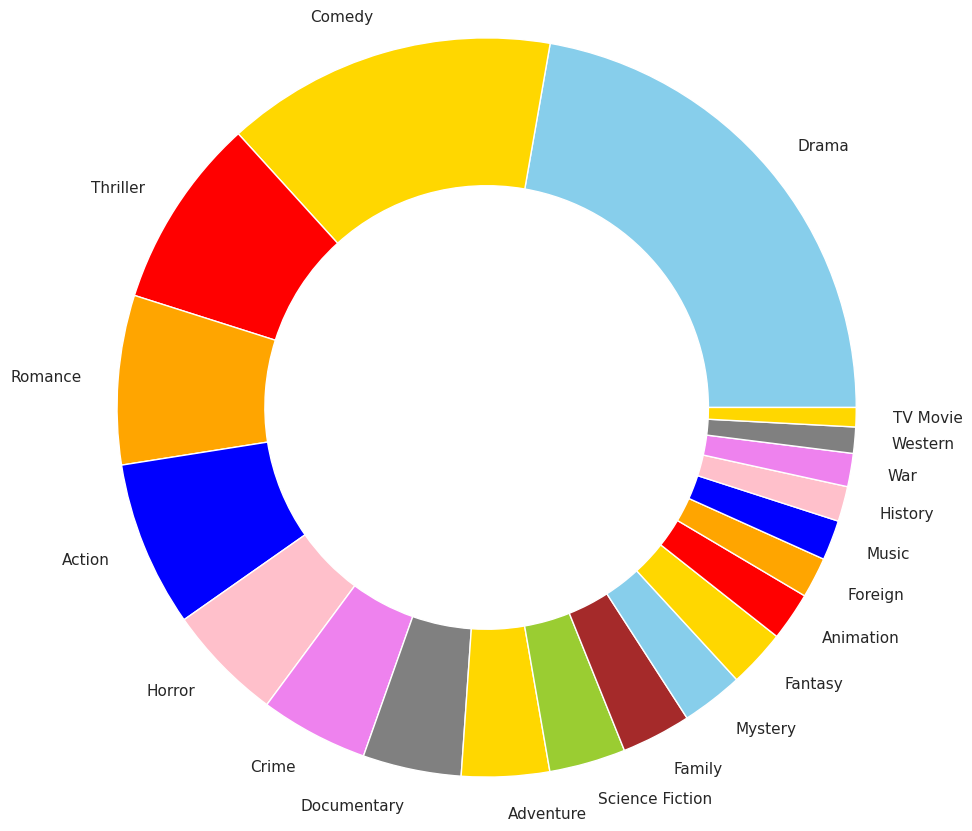

In [45]:
Genre_names=genre_counts_with_names['name']
Genre_Size=genre_counts_with_names['count']

plt.figure(figsize=(15,15))
fig, gen = plt.subplots()
gen.axis('equal')
Genpie, _ = gen.pie(Genre_Size, radius=2.5, labels=Genre_names, colors = ['skyblue', 'gold','red','orange','blue','pink','violet','grey','gold','yellowgreen','brown'])
plt.setp(Genpie, width=1, edgecolor='white')
plt.margins(0,0)

#### Q3. What is the average rating according to votes?

The majority of movies are rated in the 7-7.5 range.

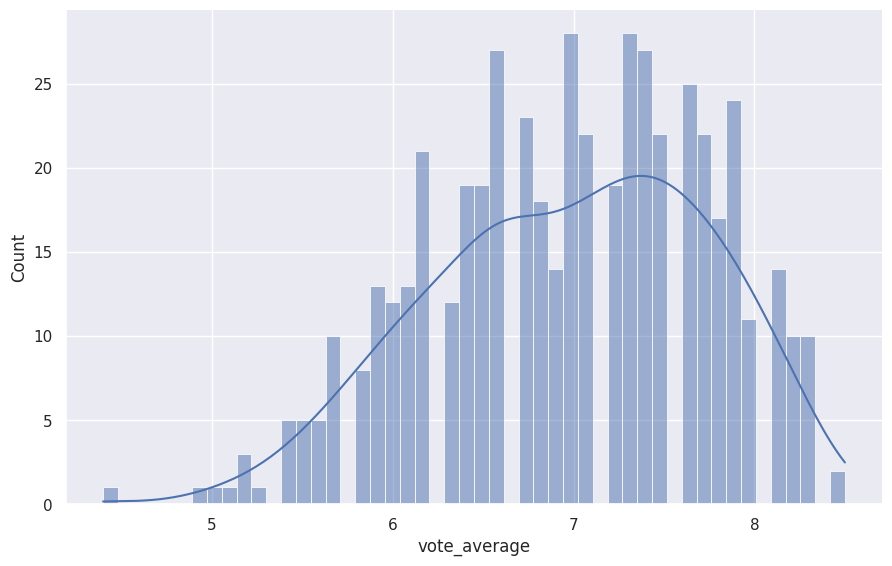

In [28]:
df_2000plus = df_movies[df_movies['vote_count'] >= 2000]
sns.set_theme()
sns.displot(df_2000plus['vote_average'], bins=50, kde=True)
plt.gcf().set_size_inches(10, 6)

#### Q4. What are the top most popular movies and what genre do they belong to?

The top 10 most popular movies are shown below as well as their genres.

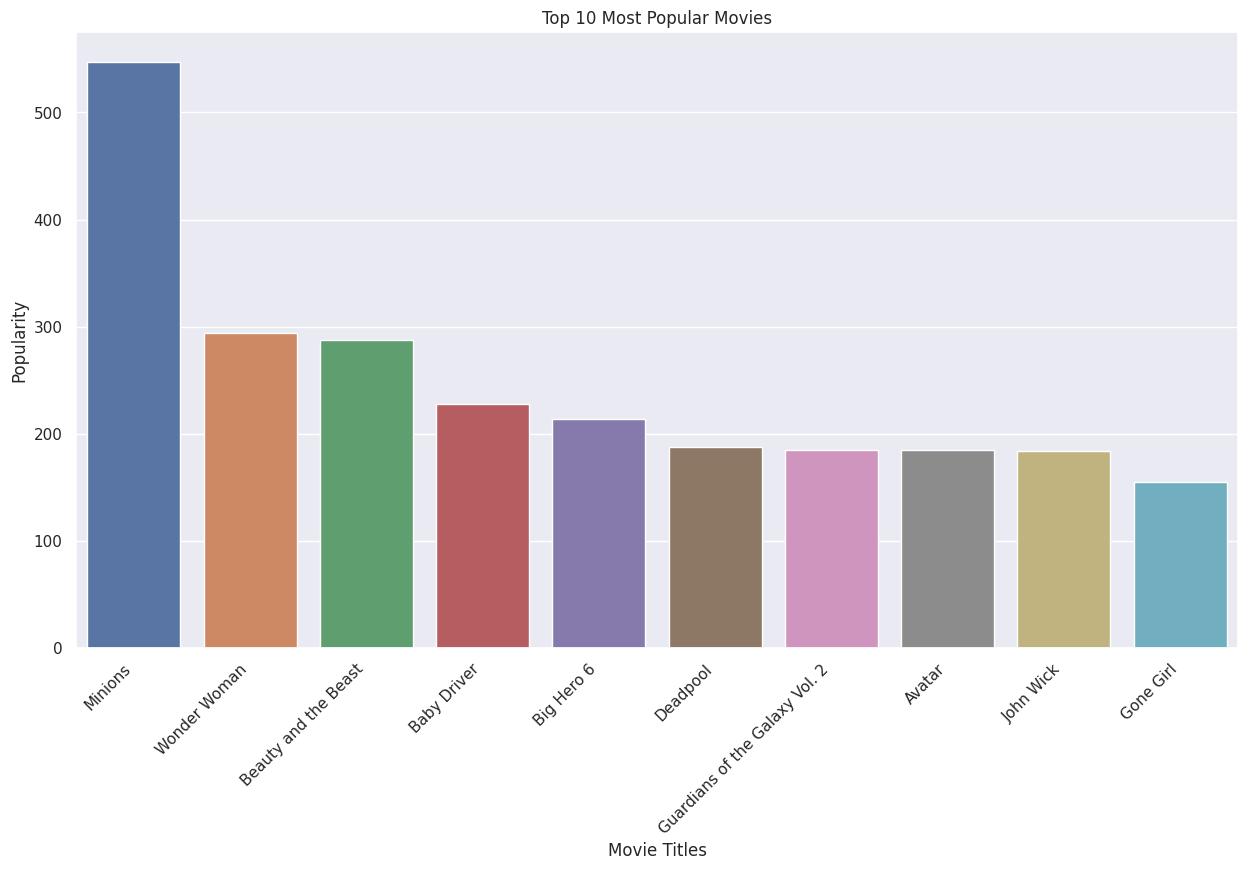

In [32]:
# First, we'll sort the DataFrame by popularity score in descending order and select the top 10 movies
top_movies = df_movies.sort_values(by='popularity', ascending=False).head(10)
# Create a bar plot of the top 10 most popular movies
ax = sns.barplot(x='title', y='popularity', data=top_movies)
plt.gcf().set_size_inches(15, 8)
ax.set(xlabel='Movie Titles', ylabel='Popularity')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Most Popular Movies')
plt.show()

In [34]:
top_movies[['title','genres']]

,title,genres
30665,Minions,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '..."
33316,Wonder Woman,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
42151,Beauty and the Beast,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '..."
43567,Baby Driver,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
24426,Big Hero 6,"[{'id': 12, 'name': 'Adventure'}, {'id': 10751..."
26534,Deadpool,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
26536,Guardians of the Galaxy Vol. 2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
14545,Avatar,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
24322,John Wick,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam..."
23648,Gone Girl,"[{'id': 9648, 'name': 'Mystery'}, {'id': 53, '..."


#### Q5 How much correlated are features such as: Popularity, vote_average

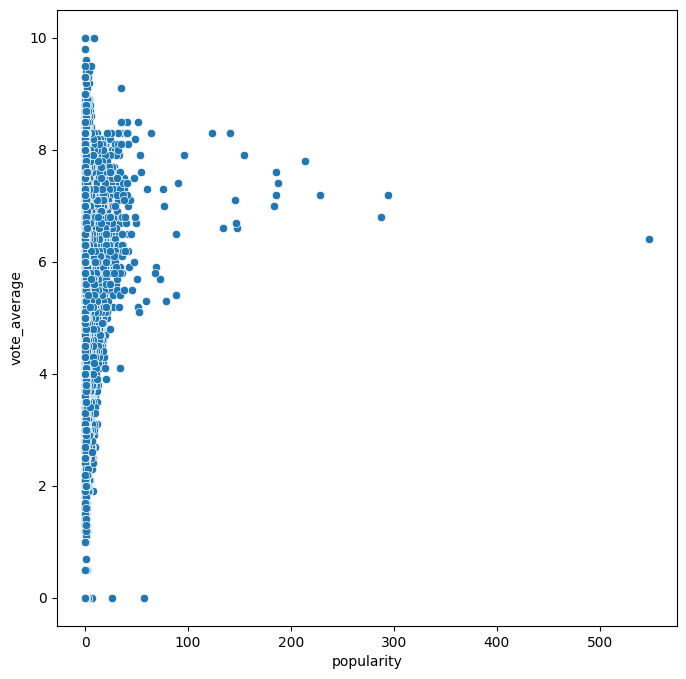

In [6]:
plt.figure(figsize=(8,8))
a=sns.scatterplot(x="popularity", y="vote_average",data=df_movies)

#### Q6 Which are the more relevant Actors?

In [3]:
def get_actor_info(nombre):
    # Filter the crew DataFrame to include only rows for the given director
    actors_df = df_cast[df_cast['name'].str.lower() == nombre.lower()]

    # Join the director_df with the movies_df on the 'id' column
    joined_df = actors_df.merge(df_movies, left_on='movie_id', right_on='id')
    # Calculate the sum of the 'return' column
    return_sum = joined_df['return'].sum()
    # Calculate the number of movies directed by the director
    movie_count = actors_df['movie_id'].count()
    # Calculate the average return per movie
    average_return = return_sum / movie_count
    # Return a dictionary with the director name, accumulated return, number of directed movies, and average return
    return {'Director': nombre,
            'Accumulated Return': return_sum,
            'Number of Directed Movies': movie_count,
            'Average Return per Movie': average_return}

# Use a list comprehension to get the accumulated returns, number of directed movies, and average returns for each director
actor_info_list = [get_actor_info(actor) for actor in df_cast['name'].unique()]
# Convert the list of dictionaries to a DataFrame
actor_info_df = pd.DataFrame(actor_info_list)
# Sort the DataFrame by accumulated return in descending order
actor_info_df = actor_info_df.sort_values(by='Accumulated Return', ascending=False)



KeyError: 'Actor'

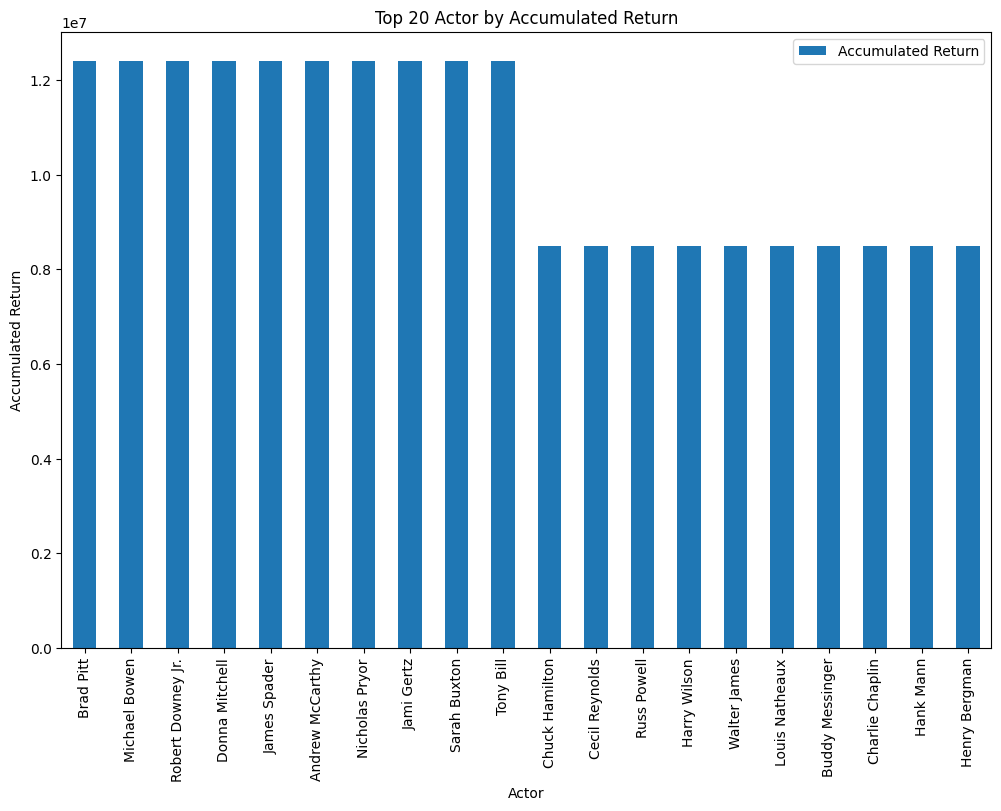

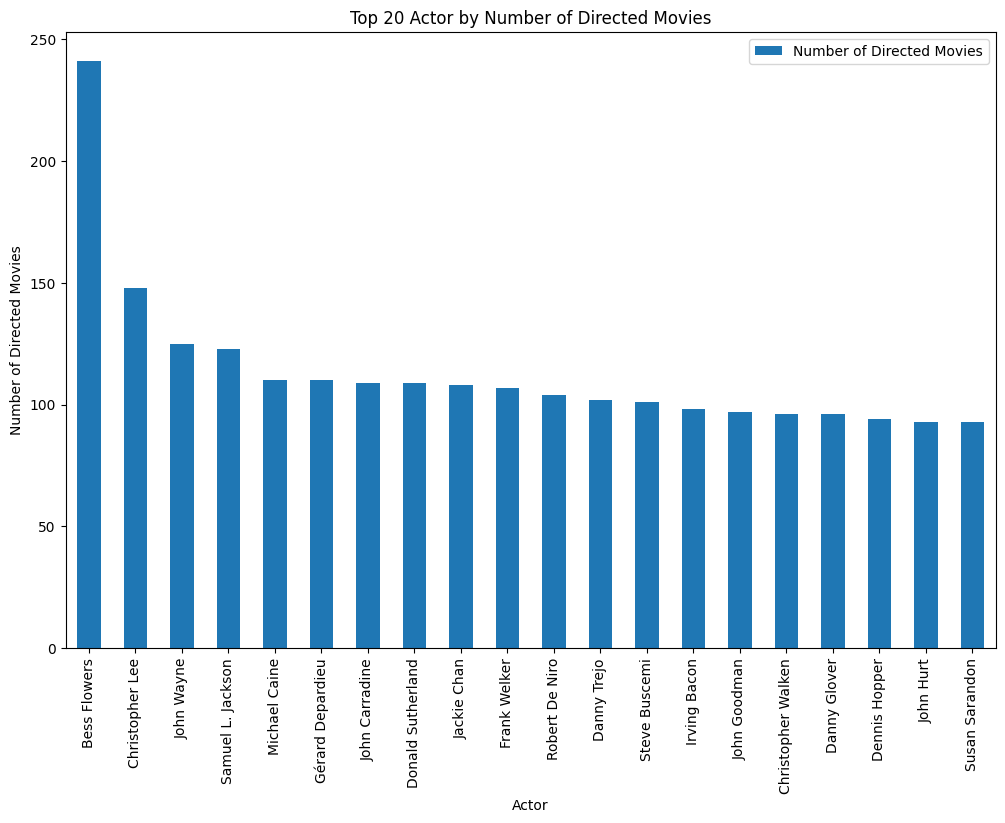

In [5]:
actor_info_df# Create a bar plot of the top 20 directors with the greatest accumulated return
top_actors_by_return = actor_info_df.head(20)
top_actors_by_return.plot(kind='bar', x='Director', y='Accumulated Return', figsize=(12, 8))
plt.xlabel('Actor')
plt.ylabel('Accumulated Return')
plt.title('Top 20 Actor by Accumulated Return')
plt.show()

# Sort the DataFrame by number of directed movies in descending order
actor_info_df = actor_info_df.sort_values(by='Number of Directed Movies', ascending=False)

# Create a bar plot of the top 20 directors with the most directed movies
top_actors_by_movies = actor_info_df.head(20)
top_actors_by_movies.plot(kind='bar', x='Director', y='Number of Directed Movies', figsize=(12, 8))
plt.xlabel('Actor')
plt.ylabel('Number of Directed Movies')
plt.title('Top 20 Actor by Number of Directed Movies')
plt.show()

#### Q7 Which are the more relevant Directors?

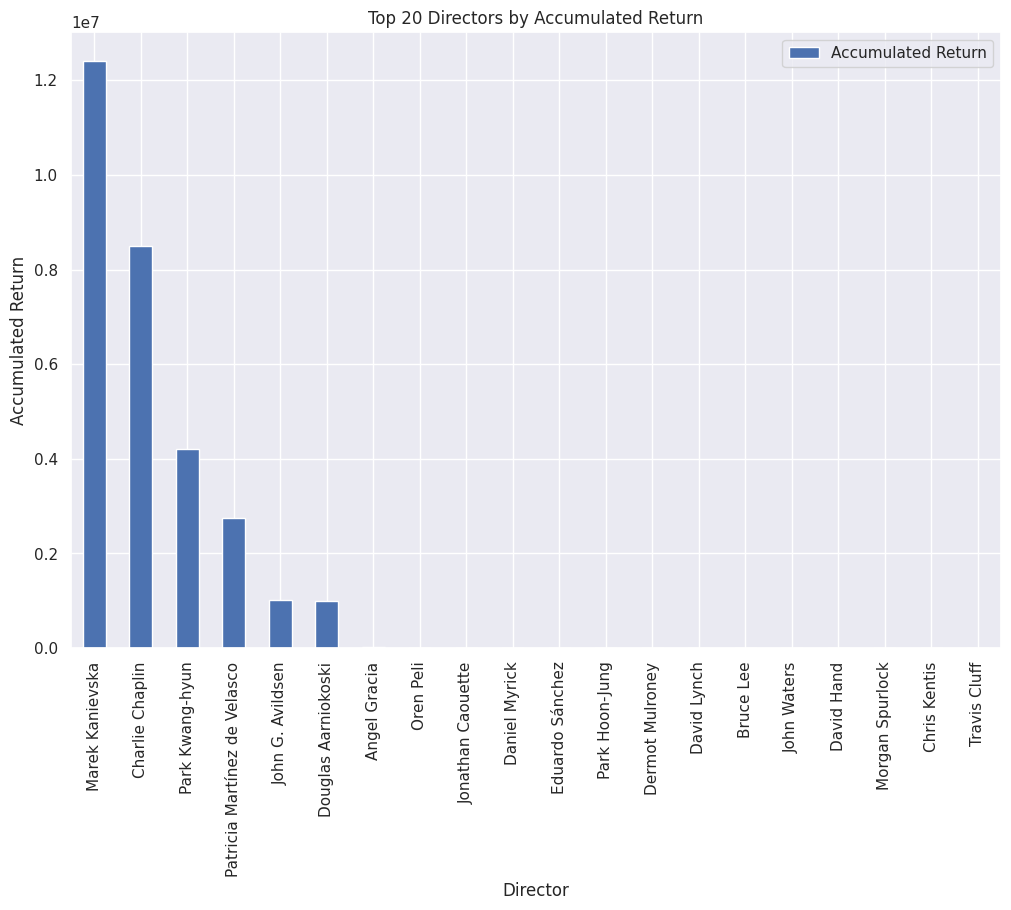

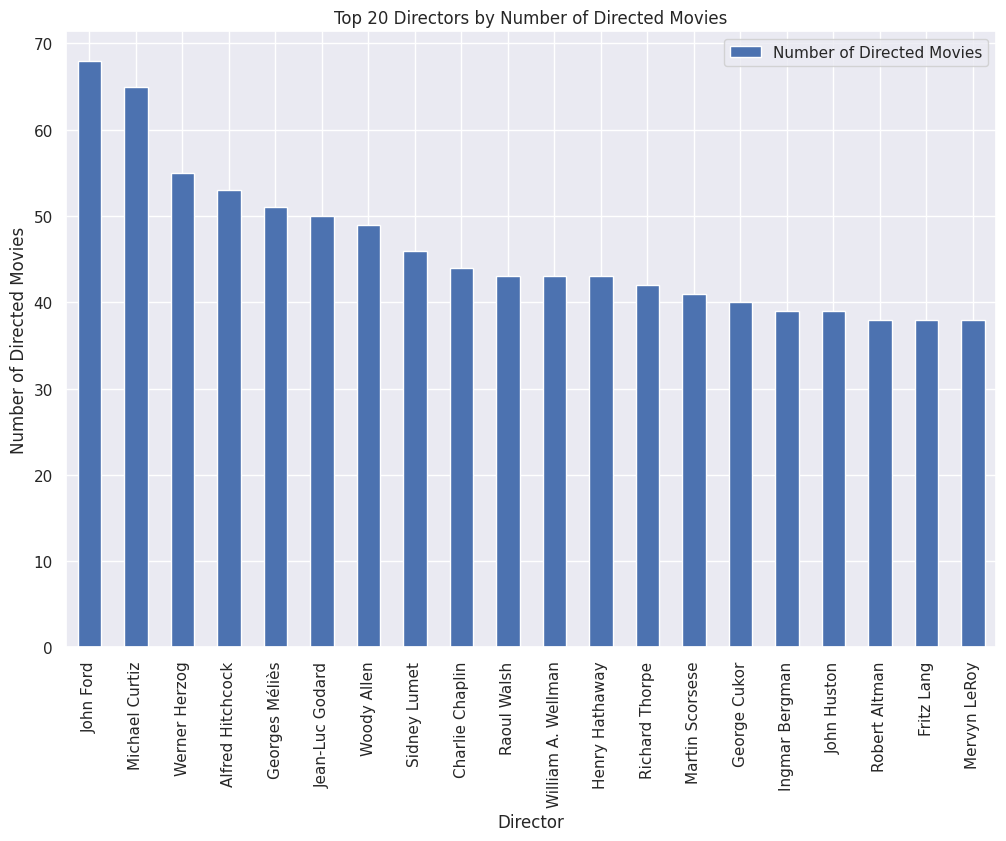

In [46]:
def get_director_info(nombre_director):
    # Filter the crew DataFrame to include only rows for the given director
    director_df = df_crew[df_crew['name'].str.lower() == nombre_director.lower()]
    director_df = director_df[director_df['job'] == 'Director']
    # Join the director_df with the movies_df on the 'id' column
    joined_df = director_df.merge(df_movies, left_on='movie_id', right_on='id')
    # Calculate the sum of the 'return' column
    return_sum = joined_df['return'].sum()
    # Calculate the number of movies directed by the director
    movie_count = director_df['movie_id'].count()
    # Calculate the average return per movie
    average_return = return_sum / movie_count
    # Return a dictionary with the director name, accumulated return, number of directed movies, and average return
    return {'Director': nombre_director,
            'Accumulated Return': return_sum,
            'Number of Directed Movies': movie_count,
            'Average Return per Movie': average_return}

# Use a list comprehension to get the accumulated returns, number of directed movies, and average returns for each director
director_info_list = [get_director_info(director) for director in df_crew[df_crew['job'] == 'Director']['name'].unique()]
# Convert the list of dictionaries to a DataFrame
director_info_df = pd.DataFrame(director_info_list)
# Sort the DataFrame by accumulated return in descending order
director_info_df = director_info_df.sort_values(by='Accumulated Return', ascending=False)

# Create a bar plot of the top 20 directors with the greatest accumulated return
top_directors_by_return = director_info_df.head(20)
top_directors_by_return.plot(kind='bar', x='Director', y='Accumulated Return', figsize=(12, 8))
plt.xlabel('Director')
plt.ylabel('Accumulated Return')
plt.title('Top 20 Directors by Accumulated Return')
plt.show()

# Sort the DataFrame by number of directed movies in descending order
director_info_df = director_info_df.sort_values(by='Number of Directed Movies', ascending=False)

# Create a bar plot of the top 20 directors with the most directed movies
top_directors_by_movies = director_info_df.head(20)
top_directors_by_movies.plot(kind='bar', x='Director', y='Number of Directed Movies', figsize=(12, 8))
plt.xlabel('Director')
plt.ylabel('Number of Directed Movies')
plt.title('Top 20 Directors by Number of Directed Movies')
plt.show()

#### Q8 Which are the most common words to describe a movie?

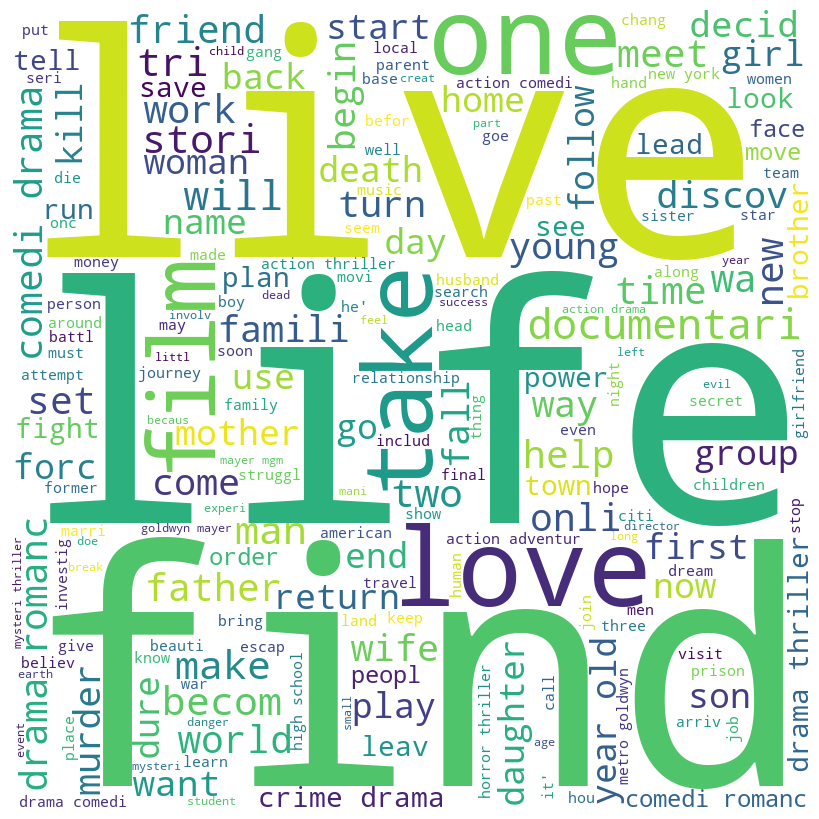

In [22]:
from wordcloud import WordCloud, STOPWORDS

# Generar una nube de palabras de la columna 'title'
# Concatenate all the tags into a single string, separated by spaces
tags_str = ' '.join(df_tags['tags'].values)

# Generate a word cloud
stopwords = set(STOPWORDS)
addtional_stopwords = ["hi","ha","thi"]
stopwords.update(addtional_stopwords)
wordcloud = WordCloud(width = 800, height = 800, 
                      stopwords = stopwords,
                background_color ='white', 
                min_font_size = 10).generate(tags_str)

# Plot the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()